# Cos'è Pandas?

Nella precedente lezione abbiamo visto come NumPy permetta di arricchire Python con il supporto ai tensori e alle operazioni sugli stessi. 

In maniera simile, Pandas è un package che arricchisce Python con il supporto ai *DataFrame*, simile al concetto di tabella nel mondo dei database relazionali (o ad una tabella Microsoft Excel), con intestazioni (labels) per le righe e per le colonne. I DataFrames sono organizzati per colonne e permettono di avere al loro interno oggetti di tipo differente e/o valori mancanti (al contrario dunque degli NDArray di NumPy). 

Pandas richiede NumPy per funzionare. Difatti, si basa su quest'ultimo per eseguire le operazioni algebriche (come le operazioni matriciali), sfruttando l'elevata efficienza delle implementazioni di NumPy. Ciononostante, le strutture dati definite in Pandas non sono basate su NumPy. 

Tutti i laboratori presenti nel corso avranno già una versione di Pandas installata. In questa lezione vedremo i concetti e i comandi fondamentali nell'utilizzo di Pandas per la Data Science. La guida ufficiale completa è reperibile sul [sito ufficiale](https://pandas.pydata.org/docs/). Si noti inoltre che le funzionalità e la sintassi dei comandi possono variare tra le varie release. Questo documento fa riferimento alla versione `1.0.3`.

# Utilizzare Pandas

Come tutte le librerie Python, per poter utilizzare Pandas è necessario prima importare la libreria tramite il comando `import`

In [1]:
import pandas as pd     #pd è l'alias comunemente utilizzato dalla community per riferirsi a Pandas
pd.__version__          #Metodo alternativo (rispetto a quello visto nella lezione precedente) per ottenere la versione installata

'1.0.3'

## Series e DataFrames

Due sono le principali strutture dati introdotte da Pandas:

  * `DataFrame`, simili al concetto di tabella, con righe e colonne dotate di intestazione;
  * `Series`, una singola colonna di dati. Ne risulta che un `DataFrame` contiene una o più `Series` e un identificativo (nome) per ognuna di esse.

  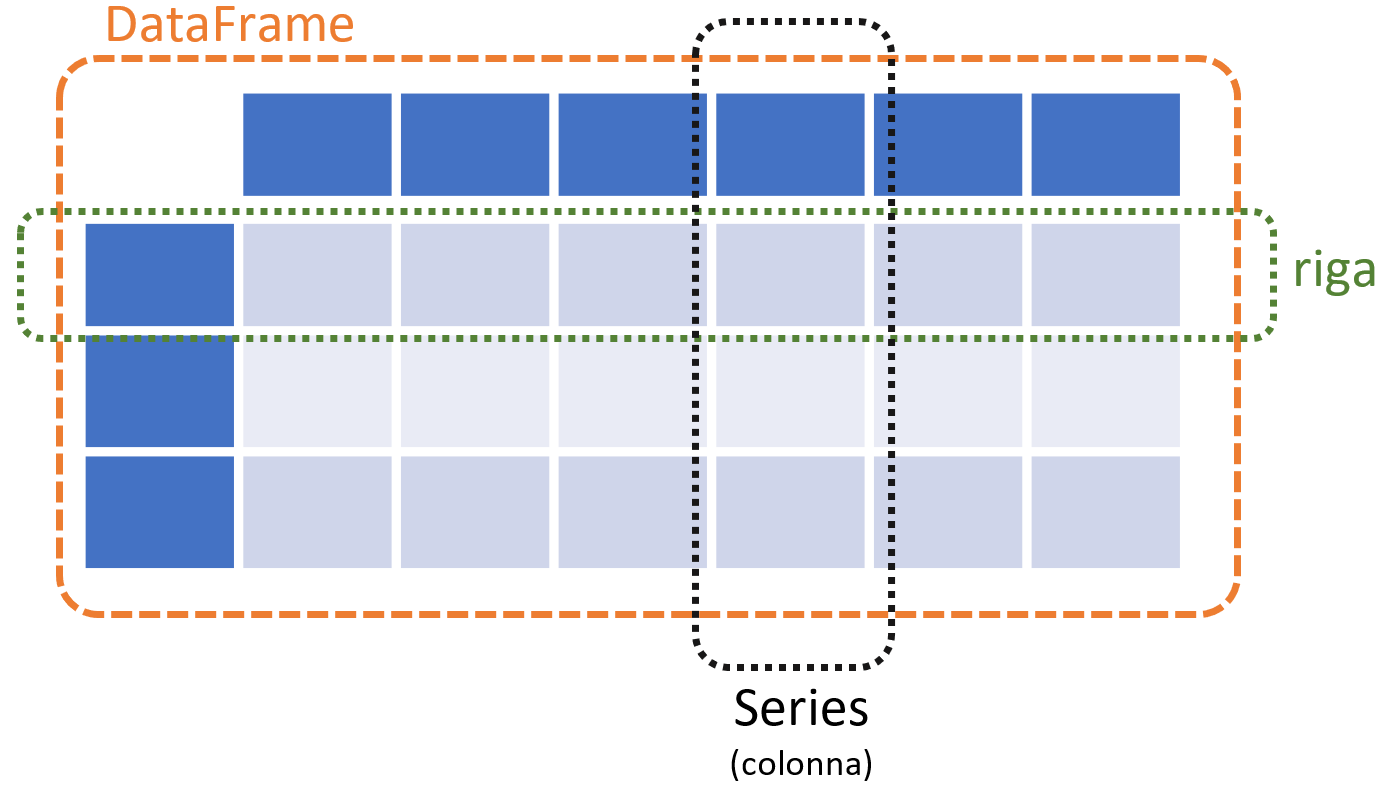

È importante notare che il tipo Series è **letteralmente** il tipo di dato di una singola colonna di un DataFrame, in quanto i dati di quest'ultimo sono memorizzati come insieme (collection) di Series. Concettualmente, questa relazione è molto simile a quella esistente tra le liste e le matrici. Una delle conseguenze di tale relazione è che i DataFrames sono concettualmente pensati per essere bidimensionali (sebbene possano essere logicamente multidimensionali tramite il concetto di multi-indexing).

In maniera simile a NumPy, uno dei possibili modi per creare una *Series* è tramite l'inizializzazione esplicita del suo contenuto. Ad esempio, volendo creare l'elenco delle province della Campania

In [2]:
provinceCampania = pd.Series(['Napoli', 'Caserta', 'Salerno', 'Avellino', 'Benevento'])
print(provinceCampania)

0       Napoli
1      Caserta
2      Salerno
3     Avellino
4    Benevento
dtype: object


Il comando `print` mostra chiaramente una delle caratteristiche fondamentali delle strutture dati Pandas: l'indice degli elementi (es. Napoli ha indice 0). Queste informazioni possono anche essere lette separatamente

In [3]:
#Accesso ai soli dati contenuti nella Series
nomiProvince = provinceCampania.values

#Accesso ai soli indici dei dati contenuti nella Series
indiciProvince = provinceCampania.index

Uno dei modi per creare un DataFrame, è quello di "concatenare" diversi Series (colonne). A tal fine, è possibile utilizzare un *dict* per mappare i nomi delle colonne (*string*) alle rispettive *Series*. Ad esempio, volendo aggiungere dettagli sulla popolazione e sulla superfice

In [4]:
popolazioneProvinceCampania = pd.Series([3082905, 922171, 1092779	, 413926, 274080])
superficeProvinceCampania = pd.Series([1178.93, 2651.35, 4954.16, 2806.07, 2080.44])

campania = pd.DataFrame({ 'Provincia': provinceCampania, 'Popolazione': popolazioneProvinceCampania, 'Superfice': superficeProvinceCampania})
print(campania)

   Provincia  Popolazione  Superfice
0     Napoli      3082905    1178.93
1    Caserta       922171    2651.35
2    Salerno      1092779    4954.16
3   Avellino       413926    2806.07
4  Benevento       274080    2080.44


In [5]:
#TASK: cosa succede se una delle series concatenate ha dimensioni differenti? 
#Ad esempio, si provi a creare lo stesso DataFrame ma utilizzando solo le superifici delle prime quattro province



## Accesso ai dati

Cosi come accade per gli NDArray, Series e DataFrame ereditano la stessa sintassi di accesso ai dati usata per liste in Python

In [6]:
#Visualizzazione del primo elemento della Series provinceCampania
print(provinceCampania[0])

#Visualizzazione dell'ultimo elemento della Series provinceCampania
print(provinceCampania.values[-1])
#print(provinceCampania.iloc[-1])     #Alternativa che forza l'interprete a restituire l'indice dell'ultimo elemento

#Estrazione dei primi 2 elementi della Series provinceCampania
a = provinceCampania[:2]  

#Visualizzazione delle province con popolazione > 1000000
print(campania[campania['Popolazione'] > 1000000])

#Estrazione della Series relative alle Superfici tramite "dot notation"
b = campania.Superfice

Napoli
Benevento
  Provincia  Popolazione  Superfice
0    Napoli      3082905    1178.93
2   Salerno      1092779    4954.16


In [7]:
#TASK: come mai l'indice -1 non può essere utilizzato direttamente per accedere all'ultimo elemento?



## Manipolare i dati

Pandas permette una manipolazione dei dati molto intuitiva, in maniera analoga al modo di procedere in NumPy. Tutte le funzionalità matematiche sono supportate. As esempio, volendo aggiungere una colonna per memorizzare la densità abitativa delle province

In [8]:
campania['Densità'] = campania['Popolazione'] / campania['Superfice']
print(campania)

   Provincia  Popolazione  Superfice      Densità
0     Napoli      3082905    1178.93  2615.002587
1    Caserta       922171    2651.35   347.811869
2    Salerno      1092779    4954.16   220.578060
3   Avellino       413926    2806.07   147.510932
4  Benevento       274080    2080.44   131.741362


Pandas permette anche di inserire facilmente nuovi dati. Ad esempio, per aggiungere la colonna del numero di comuni per ogni provincia

In [9]:
comuniProvinciaCampania = pd.Series([92, 104, 158, 118, 78])
campania['#Comuni'] = comuniProvinciaCampania

Anche l'eliminazione di dati è analogamente intuitiva



In [10]:
#Eliminazione della colonna "Popolazione"
campania.drop(['Popolazione'], axis=1, inplace=True)
print(campania)

#Eliminazione di una riga
campania.drop([2], inplace=True)
print(campania)

   Provincia  Superfice      Densità  #Comuni
0     Napoli    1178.93  2615.002587       92
1    Caserta    2651.35   347.811869      104
2    Salerno    4954.16   220.578060      158
3   Avellino    2806.07   147.510932      118
4  Benevento    2080.44   131.741362       78
   Provincia  Superfice      Densità  #Comuni
0     Napoli    1178.93  2615.002587       92
1    Caserta    2651.35   347.811869      104
3   Avellino    2806.07   147.510932      118
4  Benevento    2080.44   131.741362       78


In [11]:
#TASK: cosa succede se non eseguo le operazioni "inplace"?



Pandas non permette l'eliminazione di elementi diversi da un'intera riga/colonna (o multipli di queste). Difatti, come per le matrici, un DataFrame non può essere costituito da colonne/righe aventi dimensioni differenti tra loro. 

Un possibile workaround è sfruttare la capacità dei DataFrame di contenere dati non eterogenei, sostituendo il valore che si vuole eliminare con `NaN`, uno speciale valore che indica "Not a Number" (letteralmente: non un numero).

In [12]:
import numpy as np

#"Eliminazione" dell'elemento in posizione [2, 2]
campania.iloc[2, 2] = np.nan
print(campania)

   Provincia  Superfice      Densità  #Comuni
0     Napoli    1178.93  2615.002587       92
1    Caserta    2651.35   347.811869      104
3   Avellino    2806.07          NaN      118
4  Benevento    2080.44   131.741362       78


## Gestione dei Missing Values

Nell'esempio precedente abbiamo volutamente inserito un missing value per "eliminare" un valore non desiderato dal DataFrame. 

I missing values sono all'ordine del giorno in ogni progetto di Data Science. Difatti, i dataset reali spesso presentano valori mancanti, ad esempio perchè una data misura non è stata effettuata, oppure a causa di un malfunzionamento che non ha permesso il salvataggio del dato. 

La gestione dei missing values è un passaggio molto importante, in quanto alcuni modelli di machine learning non sono in grado di operare (o presentano un notevole degrado di performance) in presenza di dati mancanti.

Pandas fornisce dei comandi pensati appositamento per lo scopo

In [13]:
#Individuare i valori mancanti in un dataframe
missingValues = campania.isnull()
print(missingValues)

#Rimozione delle righe contenenti (almeno) un missing value
senzaRiga = campania.dropna()
print(senzaRiga)

#Rimozione delle colonne contenenti (almeno) un missing value
senzaColonna = campania.dropna(axis='columns')
print(senzaColonna)

#Sostituzione dei valori mancanti con "0"
campaniaConSostituti = campania.fillna(0)
print(campaniaConSostituti)

   Provincia  Superfice  Densità  #Comuni
0      False      False    False    False
1      False      False    False    False
3      False      False     True    False
4      False      False    False    False
   Provincia  Superfice      Densità  #Comuni
0     Napoli    1178.93  2615.002587       92
1    Caserta    2651.35   347.811869      104
4  Benevento    2080.44   131.741362       78
   Provincia  Superfice  #Comuni
0     Napoli    1178.93       92
1    Caserta    2651.35      104
3   Avellino    2806.07      118
4  Benevento    2080.44       78
   Provincia  Superfice      Densità  #Comuni
0     Napoli    1178.93  2615.002587       92
1    Caserta    2651.35   347.811869      104
3   Avellino    2806.07     0.000000      118
4  Benevento    2080.44   131.741362       78


## Salvataggio e Caricamento

Cosi come NumPy, anche Pandas fornisce delle primitive per la lettura di dati da file. A titolo di esempio, lavoreremo sul dataset "Iris", un famoso e semplice dataset contenente informazioni su lunghezza e larghezza di petalo e sepalo di tre specie differenti di iris.

In [14]:
#Lettura del dataset iris.csv
irisDataset = pd.read_csv("iris.csv", names=['Lunghezza Sepalo', 'Larghezza Sepalo', 'Lunghezza Petalo', 'Larghezza Petalo', 'Specie'])
print(irisDataset)

     Lunghezza Sepalo  Larghezza Sepalo  Lunghezza Petalo  Larghezza Petalo  \
0                 5.1               3.5               1.4               0.2   
1                 4.9               3.0               1.4               0.2   
2                 4.7               3.2               1.3               0.2   
3                 4.6               3.1               1.5               0.2   
4                 5.0               3.6               1.4               0.2   
..                ...               ...               ...               ...   
145               6.7               3.0               5.2               2.3   
146               6.3               2.5               5.0               1.9   
147               6.5               3.0               5.2               2.0   
148               6.2               3.4               5.4               2.3   
149               5.9               3.0               5.1               1.8   

             Specie  
0       Iris-setosa  
1      

Due aspetti da notare: 

*   Il primo è che abbiamo dovuto indicare esplicitamente le label delle colonne durante la lettura. Questa operazione è necessaria in quanto il dataset utilizzato NON contiene al suo interno una riga (la prima) di intestazione. Qualora invece tale riga ci fosse, non è necessario elencare esplicitamente le label delle colonne
*   Il print di un DataFrame cosi grande tende ad essere confusionario

Una soluzione al secondo punto è utilizzare la funzione `head()` per visualizzare solo l'intestazione e le prime righe del DataFrame su cui è eseguita



In [15]:
#TASK: testare la funzione head sul DataFrame irisDataset



Cosi com'è possibile leggere da file, è anche possibile scrivere su un file

In [16]:
#Scrittura del file campania.csv contenente l'omonimo DataFrame
campania.to_csv('campania.csv',index=False)

In [17]:
#TASK: cosa succede se non indichiamo index = False?
#TASK: come possiamo salvare usando nomi diversi per le colonne?
#TASK: cosa succede ai missing values durante il salvataggio?



# Esercizio

A partire dal dataset iris.csv, realizzare un nuovo dataset "bigIris.csv" contenente le sole colonne relative al petalo e le sole righe per cui il sepalo ha una lunghezza < 5 o una larghezza < 3 (almeno una delle due condizioni). Durante il salvataggio, si preservi l'indice di riga del dataset originale


# Soluzione dell'esercizio

In [18]:
#Lettura e visualizzazione del dataset
irisDataset = pd.read_csv("iris.csv", names=['Lunghezza Sepalo', 'Larghezza Sepalo', 'Lunghezza Petalo', 'Larghezza Petalo', 'Specie'])
irisDataset.head()

#Drop delle righe che non rispettano le condizioni
irisDataset.drop(irisDataset[irisDataset['Lunghezza Sepalo'] <= 5].index, inplace=True)
irisDataset.drop(irisDataset[irisDataset['Larghezza Sepalo'] <= 3].index, inplace=True)

#Drop delle colonne relative al sepalo
irisDataset.drop(['Lunghezza Sepalo', 'Larghezza Sepalo'], axis=1, inplace=True)

#Scrittura del file campania.csv contenente l'omonimo dataframe
irisDataset.to_csv('bigIris.csv',index=True,index_label='Indice Originale')